In [54]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:

#DAD or TYPE 
%matplotlib inline
classification = "TYPE"

import pandas as pd
import numpy as np

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, normalized_mutual_info_score, adjusted_mutual_info_score

if classification == "DAD":
    %cd '/Users/jorie/Dropbox (Personal)/Insight_Personal/Analyses/ActiveCode/DAD'
    import settings
elif classification == "TYPE":
    %cd '/Users/jorie/Dropbox (Personal)/Insight_Personal/Analyses/ActiveCode/TYPE'
    import settings
    
    
%cd '/Users/jorie/Dropbox (Personal)/Insight_Personal/Analyses/ActiveCode'    
import processing
import plotting
import fcsparser as fcs


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode()
import matplotlib.pylab as plt


/Users/jorie/Dropbox (Personal)/Insight_Personal/Analyses/ActiveCode/TYPE
/Users/jorie/Dropbox (Personal)/Insight_Personal/Analyses/ActiveCode


In [56]:
if classification == "DAD":
    relevant_columns = ['FSC-H', 'SSC-H', 'DAPI H', 'FSC-A', 'SSC-A', 'DAPI A']
elif classification == "TYPE":
    type_relevant_columns = ['FSC-H', 'SSC-H']


In [57]:
settings.DATA_LOCATION

'/Users/jorie/Dropbox (Personal)/Insight_Personal/Analyses/Screens/screen_525/cell_plate_1/'

In [58]:
#get the data with the column names labeled by compound 
if classification == "DAD":
    compound_data_uncat = processing.load_and_process_data(template = "*originallabeled.fcs", features_to_scale=None)
elif classification == "TYPE":
    compound_data_uncat = processing.load_and_process_data(template = "training_set/*.fcs", features_to_scale=None)
    
compound_data = pd.concat(compound_data_uncat, join='outer', ignore_index=True)
compound_data.index = compound_data[settings.EVENT_IDENTIFYING_COLUMNS]
compound_data


,FSC-A,FSC-H,SSC-A,SSC-H,CD66B A : CD19 A : CD3 A : FITC A,CD66B H : CD19 H : CD3 H : FITC H,CD14 A : PE A,CD14 H : PE H,BL3-A,BL3-H,...,screen_number,cell_type,is_live,is_dead,is_debris,is_blast,is_healthy,well_number,cell_plate_number,filename
"(525, 1, c03, 939045.0, 99553.0, 1966693.0, 344426.0)",939045.0,1966693.0,99553.0,344426.0,41750.0,34418.0,-21164.0,5334.0,-7524.0,10667.0,...,525,blast,False,False,False,True,False,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...
"(525, 1, c03, 745636.0, 110203.0, 1887908.0, 393764.0)",745636.0,1887908.0,110203.0,393764.0,-5730.0,10182.0,-2572.0,6740.0,1844.0,9870.0,...,525,blast,False,False,False,True,False,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...
"(525, 1, c03, 919869.0, 298246.0, 1973889.0, 848368.0)",919869.0,1973889.0,298246.0,848368.0,-13568.0,8360.0,-12702.0,1605.0,18479.0,7122.0,...,525,blast,False,False,False,True,False,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...
"(525, 1, c03, 605712.0, 162817.0, 1303811.0, 480729.0)",605712.0,1303811.0,162817.0,480729.0,20745.0,26584.0,11873.0,9469.0,38728.0,12323.0,...,525,blast,False,False,False,True,False,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...
"(525, 1, c03, 983808.0, 167241.0, 2172784.0, 467204.0)",983808.0,2172784.0,167241.0,467204.0,6962.0,12496.0,-5848.0,5857.0,-6930.0,2936.0,...,525,blast,False,False,False,True,False,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...
"(525, 1, c03, 1162336.0, 311061.0, 2602472.0, 730109.0)",1162336.0,2602472.0,311061.0,730109.0,59869.0,22170.0,30230.0,11806.0,15986.0,8433.0,...,525,blast,False,False,False,True,False,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...
"(525, 1, c03, 1139810.0, 334374.0, 2497195.0, 752653.0)",1139810.0,2497195.0,334374.0,752653.0,19333.0,32625.0,4257.0,10213.0,19566.0,9055.0,...,525,blast,False,False,False,True,False,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...
"(525, 1, c03, 891091.0, 374627.0, 2138977.0, 768548.0)",891091.0,2138977.0,374627.0,768548.0,26262.0,16578.0,-3583.0,7651.0,9985.0,6630.0,...,525,blast,False,False,False,True,False,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...
"(525, 1, c03, 590320.0, 105528.0, 1612350.0, 340673.0)",590320.0,1612350.0,105528.0,340673.0,3182.0,21022.0,1.0,3457.0,6425.0,7447.0,...,525,blast,False,False,False,True,False,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...
"(525, 1, c03, 1366531.0, 466830.0, 2718092.0, 1086477.0)",1366531.0,2718092.0,466830.0,1086477.0,72307.0,28856.0,21853.0,13120.0,15186.0,7367.0,...,525,blast,False,False,False,True,False,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...


In [59]:
#get the data with the column names labeled by compound 
if classification == "DAD":
    labeled_data_uncat = processing.load_and_process_data(template = "*.fcs", features_to_scale=None)
elif classification == "TYPE":
    labeled_data_uncat = processing.load_and_process_data(template = "screen_525_cell_plate_1_labeled/*.fcs", features_to_scale=None)
    
labeled_data = pd.concat(labeled_data_uncat, join='outer', ignore_index=True)
labeled_data.index = labeled_data[settings.EVENT_IDENTIFYING_COLUMNS]

labeled_data

,FSC-H,SSC-H,CD66B H : CD19 H : CD3 H : FITC H,CD14 H : PE H,BL3-H,7AAD H,BL5-H,CD16 H : APC H,RL2-H,KIT H : BV421 H,...,CD34 A : BV605 A,VL5-A,VL6-A,Width,Time,screen_number,cell_type,well_number,cell_plate_number,filename
"(525, 1, c03, 16777215.0, 16777215.0, 8528540.0, 16772247.0)",8528540.0,16772247.0,3821.0,4139.0,5925.0,5029.0,16137.0,5158.0,17185.0,4635.0,...,155582.0,-91590.0,945194.0,5288.0,8377.0,525,unlabeled,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...
"(525, 1, c03, 45943.0, 841885.0, 127292.0, 1324132.0)",127292.0,1324132.0,975.0,329.0,566.0,2359.0,1185.0,1853.0,2624.0,260.0,...,1932.0,-1637.0,1780.0,36.0,8377.0,525,unlabeled,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...
"(525, 1, c03, 206574.0, 967099.0, 478161.0, 1274648.0)",478161.0,1274648.0,1754.0,162.0,1188.0,1808.0,3478.0,2451.0,3397.0,100.0,...,2128.0,958.0,-740.0,44.0,8377.0,525,unlabeled,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...
"(525, 1, c03, 544703.0, 987399.0, 1170827.0, 1227014.0)",1170827.0,1227014.0,1001.0,-35.0,822.0,3033.0,2302.0,973.0,4077.0,13.0,...,1290.0,3499.0,-2381.0,47.0,8377.0,525,unlabeled,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...
"(525, 1, c03, 11411532.0, 5032384.0, 5478338.0, 1183836.0)",5478338.0,1183836.0,2100.0,1163.0,2980.0,1791.0,2835.0,2861.0,5149.0,1309.0,...,2095.0,7209.0,-2710.0,282.0,8377.0,525,unlabeled,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...
"(525, 1, c03, 10816.0, 66161.0, 525806.0, 1059203.0)",525806.0,1059203.0,1957.0,1588.0,4200.0,912.0,151.0,3015.0,5149.0,966.0,...,6382.0,-583.0,1271.0,3.0,8377.0,525,unlabeled,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...
"(525, 1, c03, 440433.0, 427551.0, 2274545.0, 1018468.0)",2274545.0,1018468.0,1437.0,756.0,1082.0,2777.0,3308.0,1559.0,7177.0,4679.0,...,6592.0,-3180.0,2393.0,22.0,8377.0,525,unlabeled,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...
"(525, 1, c03, 12938496.0, 6383811.0, 4477246.0, 993058.0)",4477246.0,993058.0,1322.0,870.0,2485.0,4880.0,4574.0,2209.0,8034.0,-207.0,...,-8324.0,-4659.0,-10670.0,442.0,8377.0,525,unlabeled,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...
"(525, 1, c03, 1356985.0, 600.0, 4128643.0, 826.0)",4128643.0,826.0,1124.0,490.0,1796.0,823.0,2985.0,1617.0,2554.0,-47.0,...,134.0,-2938.0,-3526.0,45.0,8378.0,525,unlabeled,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...
"(525, 1, c03, 228070.0, 1850.0, 129050.0, 702.0)",129050.0,702.0,1002.0,1156.0,1054.0,1321.0,4515.0,1255.0,4311.0,82.0,...,-4499.0,-1713.0,-7569.0,180.0,8378.0,525,unlabeled,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...


In [60]:
#check out your data
x = compound_data.count(0)
x.sort_values()

FSC-A                                8070
VL3-A                                8070
VL3-H                                8070
CD34 A : BV605 A                     8070
CD34 H : BV605 H                     8070
VL5-A                                8070
VL5-H                                8070
VL6-A                                8070
VL6-H                                8070
Time                                 8070
screen_number                        8070
cell_type                            8070
is_live                              8070
is_dead                              8070
is_debris                            8070
is_blast                             8070
is_healthy                           8070
well_number                          8070
VL2-H                                8070
cell_plate_number                    8070
VL2-A                                8070
KIT A : BV421 A                      8070
FSC-H                                8070
SSC-A                             

In [61]:
#check out more of your data
x = labeled_data.count(0)
x.sort_values()

FSC-H                                1186576
7AAD A                               1186576
BL5-A                                1186576
CD16 A : APC A                       1186576
RL2-A                                1186576
KIT A : BV421 A                      1186576
VL2-A                                1186576
VL3-A                                1186576
CD34 A : BV605 A                     1186576
VL5-A                                1186576
VL6-A                                1186576
Width                                1186576
Time                                 1186576
screen_number                        1186576
cell_type                            1186576
well_number                          1186576
BL3-A                                1186576
cell_plate_number                    1186576
CD14 A : PE A                        1186576
SSC-A                                1186576
SSC-H                                1186576
CD66B H : CD19 H : CD3 H : FITC H    1186576
CD14 H : P

In [62]:
#merge the labeled and unlabeled data (effectively, adding labels to complete dataset)
try:
    labeled_comp_data = processing.add_labeled_columns(labeled_data, compound_data)
    labeled_comp_data
except:
    labeled_comp_data = processing.add_labeled_columns(labeled_data, compound_data)
    labeled_comp_data
    
labeled_comp_data

set([u'BL5-A', 'FSC-A', u'CD34 A : BV605 A', 'is_debris', u'BL5-H', 'SSC-A', u'CD66B A : CD19 A : CD3 A : FITC A', 'SSC-H', u'VL5-A', 'filename', u'VL5-H', 'cell_plate_number', u'VL6-H', u'CD16 A : APC A', u'KIT H : BV421 H', u'VL6-A', u'7AAD H', u'CD34 H : BV605 H', u'7AAD A', 'FSC-H', u'CD14 H : PE H', 'cell_type', 'is_blast', 'is_healthy', u'BL3-A', u'VL2-H', u'RL2-H', u'CD66B H : CD19 H : CD3 H : FITC H', 'screen_number', 'well_number', 'is_live', u'CD14 A : PE A', u'RL2-A', u'KIT A : BV421 A', u'BL3-H', u'VL3-A', u'CD16 H : APC H', u'VL2-A', 'is_dead', u'VL3-H'])
set([u'BL5-A', 'FSC-A', u'CD34 A : BV605 A', 'is_debris', u'BL5-H', 'SSC-A', u'CD66B A : CD19 A : CD3 A : FITC A', 'SSC-H', u'VL5-A', 'filename', u'VL5-H', 'cell_plate_number', u'VL6-H', u'CD16 A : APC A', u'KIT H : BV421 H', u'VL6-A', u'7AAD H', u'CD34 H : BV605 H', u'7AAD A', 'FSC-H', u'CD14 H : PE H', 'cell_type', 'is_blast', 'is_healthy', u'BL3-A', u'VL2-H', u'RL2-H', u'CD66B H : CD19 H : CD3 H : FITC H', 'screen_numb

,FSC-H,SSC-H,CD66B H : CD19 H : CD3 H : FITC H,CD14 H : PE H,BL3-H,7AAD H,BL5-H,CD16 H : APC H,RL2-H,KIT H : BV421 H,...,well_number,cell_plate_number,filename_x,cell_type_y,is_live,is_dead,is_debris,is_blast,is_healthy,filename_y
0,8528540.0,16772247.0,3821.0,4139.0,5925.0,5029.0,16137.0,5158.0,17185.0,4635.0,...,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,127292.0,1324132.0,975.0,329.0,566.0,2359.0,1185.0,1853.0,2624.0,260.0,...,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,478161.0,1274648.0,1754.0,162.0,1188.0,1808.0,3478.0,2451.0,3397.0,100.0,...,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1170827.0,1227014.0,1001.0,-35.0,822.0,3033.0,2302.0,973.0,4077.0,13.0,...,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5478338.0,1183836.0,2100.0,1163.0,2980.0,1791.0,2835.0,2861.0,5149.0,1309.0,...,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,525806.0,1059203.0,1957.0,1588.0,4200.0,912.0,151.0,3015.0,5149.0,966.0,...,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2274545.0,1018468.0,1437.0,756.0,1082.0,2777.0,3308.0,1559.0,7177.0,4679.0,...,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4477246.0,993058.0,1322.0,870.0,2485.0,4880.0,4574.0,2209.0,8034.0,-207.0,...,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4128643.0,826.0,1124.0,490.0,1796.0,823.0,2985.0,1617.0,2554.0,-47.0,...,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,129050.0,702.0,1002.0,1156.0,1054.0,1321.0,4515.0,1255.0,4311.0,82.0,...,c03,1,/Users/jorie/Dropbox (Personal)/Insight_Person...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
#clean up the NaNs in the unlabled data 
labeled_comp_data.loc[labeled_comp_data['cell_type_y'].isnull(),'cell_type_y'] = "nontarget"
labeled_comp_data['cell_type'] = labeled_comp_data['cell_type_y']



In [64]:
#make the cell type label numeric for further modeling 
labeled_comp_data.loc[pd.isnull(labeled_comp_data['is_blast']) ,'is_blast'] = False
labeled_comp_data.loc[pd.isnull(labeled_comp_data['is_healthy']) ,'is_healthy'] = False
labeled_comp_data.loc[pd.isnull(labeled_comp_data['is_live']) ,'is_live'] = False
labeled_comp_data.loc[pd.isnull(labeled_comp_data['is_debris']) ,'is_debris'] = False
labeled_comp_data.loc[pd.isnull(labeled_comp_data['is_dead']) ,'is_dead'] = False
                      
labeled_comp_data['is_live']= pd.to_numeric(labeled_comp_data['is_live']*1)
labeled_comp_data['is_blast']= pd.to_numeric(labeled_comp_data['is_blast']*1)
labeled_comp_data['is_healthy']= pd.to_numeric(labeled_comp_data['is_healthy']*1) 
labeled_comp_data['is_dead']= pd.to_numeric(labeled_comp_data['is_dead']*1)
labeled_comp_data['is_debris']= pd.to_numeric(labeled_comp_data['is_debris']*1)



In [65]:
#grab the columns of interest, and log and scale them 
x = labeled_comp_data.filter(regex='H')
x.drop('FSC-H',1)
x.drop('SSC-H',1)
scalenames = list(x.columns.values)

processing.scale_data(labeled_comp_data,scalenames)
processing.log_data(labeled_comp_data,scalenames)
list(labeled_comp_data.columns.values)

[u'FSC-H',
 u'SSC-H',
 u'CD66B H : CD19 H : CD3 H : FITC H',
 u'CD14 H : PE H',
 u'BL3-H',
 u'7AAD H',
 u'BL5-H',
 u'CD16 H : APC H',
 u'RL2-H',
 u'KIT H : BV421 H',
 u'VL2-H',
 u'VL3-H',
 u'CD34 H : BV605 H',
 u'VL5-H',
 u'VL6-H',
 u'FSC-A',
 u'SSC-A',
 u'CD66B A : CD19 A : CD3 A : FITC A',
 u'CD14 A : PE A',
 u'BL3-A',
 u'7AAD A',
 u'BL5-A',
 u'CD16 A : APC A',
 u'RL2-A',
 u'KIT A : BV421 A',
 u'VL2-A',
 u'VL3-A',
 u'CD34 A : BV605 A',
 u'VL5-A',
 u'VL6-A',
 u'Width',
 u'Time',
 'screen_number',
 'cell_type_x',
 'well_number',
 'cell_plate_number',
 'filename_x',
 'cell_type_y',
 'is_live',
 'is_dead',
 'is_debris',
 'is_blast',
 'is_healthy',
 'filename_y',
 'cell_type',
 u'FSC-H_scaled',
 u'SSC-H_scaled',
 u'CD66B H : CD19 H : CD3 H : FITC H_scaled',
 u'CD14 H : PE H_scaled',
 u'BL3-H_scaled',
 u'7AAD H_scaled',
 u'BL5-H_scaled',
 u'CD16 H : APC H_scaled',
 u'RL2-H_scaled',
 u'KIT H : BV421 H_scaled',
 u'VL2-H_scaled',
 u'VL3-H_scaled',
 u'CD34 H : BV605 H_scaled',
 u'VL5-H_scaled'

In [66]:
#replace NAs with median 
labeled_comp_data_backup = labeled_comp_data
names = labeled_comp_data._get_numeric_data().columns.values
#labeled_comp_data[names].fillna(labeled_comp_data[names].mean())
#print(np.where(pd.isnull(labeled_comp_data[names])))
#print labeled_comp_data[names].iloc[3,55]
#x = labeled_comp_data[names].median()



In [67]:
x = labeled_comp_data[names].fillna(labeled_comp_data[names].median())
labeled_comp_data[names] = x 
labeled_comp_data[names].isnull().sum()

FSC-H                                       0
SSC-H                                       0
CD66B H : CD19 H : CD3 H : FITC H           0
CD14 H : PE H                               0
BL3-H                                       0
7AAD H                                      0
BL5-H                                       0
CD16 H : APC H                              0
RL2-H                                       0
KIT H : BV421 H                             0
VL2-H                                       0
VL3-H                                       0
CD34 H : BV605 H                            0
VL5-H                                       0
VL6-H                                       0
FSC-A                                       0
SSC-A                                       0
CD66B A : CD19 A : CD3 A : FITC A           0
CD14 A : PE A                               0
BL3-A                                       0
7AAD A                                      0
BL5-A                             

In [68]:
#check out that you have reasonable data: how many cell types
labeled_comp_data.groupby('cell_type').count()


,FSC-H,SSC-H,CD66B H : CD19 H : CD3 H : FITC H,CD14 H : PE H,BL3-H,7AAD H,BL5-H,CD16 H : APC H,RL2-H,KIT H : BV421 H,...,7AAD H_log,BL5-H_log,CD16 H : APC H_log,RL2-H_log,KIT H : BV421 H_log,VL2-H_log,VL3-H_log,CD34 H : BV605 H_log,VL5-H_log,VL6-H_log
cell_type,,,,,,,,,,,,,,,,,,,,,
blast,3540,3540,3540,3540,3540,3540,3540,3540,3540,3540,...,3540,3540,3540,3540,3540,3540,3540,3540,3540,3540
healthy,4530,4530,4530,4530,4530,4530,4530,4530,4530,4530,...,4530,4530,4530,4530,4530,4530,4530,4530,4530,4530
nontarget,1178506,1178506,1178506,1178506,1178506,1178506,1178506,1178506,1178506,1178506,...,1178506,1178506,1178506,1178506,1178506,1178506,1178506,1178506,1178506,1178506


In [69]:
#check out that you have reasonable data: how many screens
labeled_comp_data.groupby('screen_number').count()

,FSC-H,SSC-H,CD66B H : CD19 H : CD3 H : FITC H,CD14 H : PE H,BL3-H,7AAD H,BL5-H,CD16 H : APC H,RL2-H,KIT H : BV421 H,...,7AAD H_log,BL5-H_log,CD16 H : APC H_log,RL2-H_log,KIT H : BV421 H_log,VL2-H_log,VL3-H_log,CD34 H : BV605 H_log,VL5-H_log,VL6-H_log
screen_number,,,,,,,,,,,,,,,,,,,,,
525,1186576,1186576,1186576,1186576,1186576,1186576,1186576,1186576,1186576,1186576,...,1186576,1186576,1186576,1186576,1186576,1186576,1186576,1186576,1186576,1186576


In [70]:
#check out that you have reasonable data: how many wells
labeled_comp_data.groupby('well_number').count()

,FSC-H,SSC-H,CD66B H : CD19 H : CD3 H : FITC H,CD14 H : PE H,BL3-H,7AAD H,BL5-H,CD16 H : APC H,RL2-H,KIT H : BV421 H,...,7AAD H_log,BL5-H_log,CD16 H : APC H_log,RL2-H_log,KIT H : BV421 H_log,VL2-H_log,VL3-H_log,CD34 H : BV605 H_log,VL5-H_log,VL6-H_log
well_number,,,,,,,,,,,,,,,,,,,,,
c03,9081,9081,9081,9081,9081,9081,9081,9081,9081,9081,...,9081,9081,9081,9081,9081,9081,9081,9081,9081,9081
c04,4222,4222,4222,4222,4222,4222,4222,4222,4222,4222,...,4222,4222,4222,4222,4222,4222,4222,4222,4222,4222
c05,6874,6874,6874,6874,6874,6874,6874,6874,6874,6874,...,6874,6874,6874,6874,6874,6874,6874,6874,6874,6874
c06,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,...,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207
c07,10189,10189,10189,10189,10189,10189,10189,10189,10189,10189,...,10189,10189,10189,10189,10189,10189,10189,10189,10189,10189
c08,12400,12400,12400,12400,12400,12400,12400,12400,12400,12400,...,12400,12400,12400,12400,12400,12400,12400,12400,12400,12400
c09,5466,5466,5466,5466,5466,5466,5466,5466,5466,5466,...,5466,5466,5466,5466,5466,5466,5466,5466,5466,5466
c10,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,...,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439
c11,5751,5751,5751,5751,5751,5751,5751,5751,5751,5751,...,5751,5751,5751,5751,5751,5751,5751,5751,5751,5751


In [427]:
#grab your subset of data
screenTarget = "525"
wellTarget = "c16" 

subset = labeled_comp_data.loc[(labeled_comp_data.screen_number==screenTarget)&(labeled_comp_data.well_number==wellTarget)]
subset

,FSC-H,SSC-H,CD66B H : CD19 H : CD3 H : FITC H,CD14 H : PE H,BL3-H,7AAD H,BL5-H,CD16 H : APC H,RL2-H,KIT H : BV421 H,...,7AAD H_log,BL5-H_log,CD16 H : APC H_log,RL2-H_log,KIT H : BV421 H_log,VL2-H_log,VL3-H_log,CD34 H : BV605 H_log,VL5-H_log,VL6-H_log
92269,8543385.0,16755242.0,4430.0,6610.0,6902.0,6784.0,13595.0,4529.0,16567.0,11805.0,...,8.822322,9.517457,8.418257,9.715168,9.376279,9.340667,8.830397,9.944725,9.331407,9.138308
92270,264360.0,19348.0,808.0,553.0,951.0,1025.0,1994.0,850.0,3536.0,289.0,...,6.932448,7.597898,6.745236,8.170752,5.666427,7.271008,6.375025,7.433075,7.939872,8.580168
92271,828839.0,18590.0,1153.0,828.0,1159.0,732.0,502.0,1883.0,2023.0,31.0,...,6.595780,6.218600,7.540622,7.612337,3.433987,7.887959,6.052089,7.646832,7.603898,8.182559
92272,2201084.0,17848.0,521.0,973.0,2110.0,1440.0,1866.0,1324.0,2220.0,233.0,...,7.272398,7.531552,7.188413,7.705263,5.451038,7.234899,5.159055,7.754481,6.969790,8.296047
92273,6963487.0,17129.0,3720.0,2369.0,5240.0,4178.0,2532.0,1819.0,4357.0,2034.0,...,8.337588,7.836765,7.506042,8.379539,7.617760,7.920083,8.215817,8.573384,7.961021,8.292298
92274,7203187.0,15459.0,77490.0,33169.0,29204.0,19975.0,4060.0,8937.0,8373.0,44286.0,...,9.902237,8.308938,9.097956,9.032767,10.698424,10.932232,10.197388,11.126807,10.339029,9.025455
92275,364217.0,309410.0,16964.0,7729.0,8828.0,2961.0,1321.0,3461.0,-55.0,5916.0,...,7.993282,7.186144,8.149313,7.647786,8.685416,10.757072,9.543593,10.005774,9.115150,7.460490
92276,109930.0,83149.0,16956.0,6738.0,5118.0,5488.0,2047.0,3785.0,1866.0,4587.0,...,8.610319,7.624131,8.238801,7.531552,8.430982,9.626944,8.647695,9.358674,8.135054,7.638680
92277,150316.0,94774.0,11153.0,3758.0,1836.0,3709.0,807.0,4266.0,2117.0,2031.0,...,8.218517,6.693324,8.358432,7.657755,7.616283,8.822322,8.697846,8.884334,8.502688,6.643790
92278,320700.0,1285534.0,4918.0,1983.0,1987.0,4205.0,1050.0,5081.0,1886.0,2679.0,...,8.344029,6.956545,8.533263,7.542213,7.893199,8.986321,8.446342,8.838552,8.666991,7.382124


In [428]:
#make sure there is something to analyze
subset.groupby('cell_type').count()

,FSC-H,SSC-H,CD66B H : CD19 H : CD3 H : FITC H,CD14 H : PE H,BL3-H,7AAD H,BL5-H,CD16 H : APC H,RL2-H,KIT H : BV421 H,...,7AAD H_log,BL5-H_log,CD16 H : APC H_log,RL2-H_log,KIT H : BV421 H_log,VL2-H_log,VL3-H_log,CD34 H : BV605 H_log,VL5-H_log,VL6-H_log
cell_type,,,,,,,,,,,,,,,,,,,,,
blast,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
healthy,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
nontarget,5626,5626,5626,5626,5626,5626,5626,5626,5626,5626,...,5626,5626,5626,5626,5626,5626,5626,5626,5626,5626


# Explore me!


In [429]:
import seaborn as sns
sns.set(context="paper", font="monospace")


In [430]:
logcols = labeled_comp_data.filter(regex='log|is').columns.values
logcols[logcols =='FSC-H_log'] = 'FSC-H'
logcols[logcols =='SSC-H_log'] = 'SSC-H'
logcols

array(['is_live', 'is_dead', 'is_debris', 'is_blast', 'is_healthy',
       'FSC-H', 'SSC-H', u'CD66B H : CD19 H : CD3 H : FITC H_log',
       u'CD14 H : PE H_log', u'BL3-H_log', u'7AAD H_log', u'BL5-H_log',
       u'CD16 H : APC H_log', u'RL2-H_log', u'KIT H : BV421 H_log',
       u'VL2-H_log', u'VL3-H_log', u'CD34 H : BV605 H_log', u'VL5-H_log',
       u'VL6-H_log'], dtype=object)

In [431]:
#re order for plotting 
cols = labeled_comp_data.columns.tolist()

b = [labeled_comp_data.columns.get_loc("is_blast"),labeled_comp_data.columns.get_loc("is_healthy"), 
     labeled_comp_data.columns.get_loc("is_live"),labeled_comp_data.columns.get_loc("is_dead"),
     labeled_comp_data.columns.get_loc("is_debris")]
b.sort()
a = [ cols[i] for i in b]

cols[b[0]:b[len(b)-1]+1] = []
cols[0:0] = a
cols
ld = labeled_comp_data[cols]




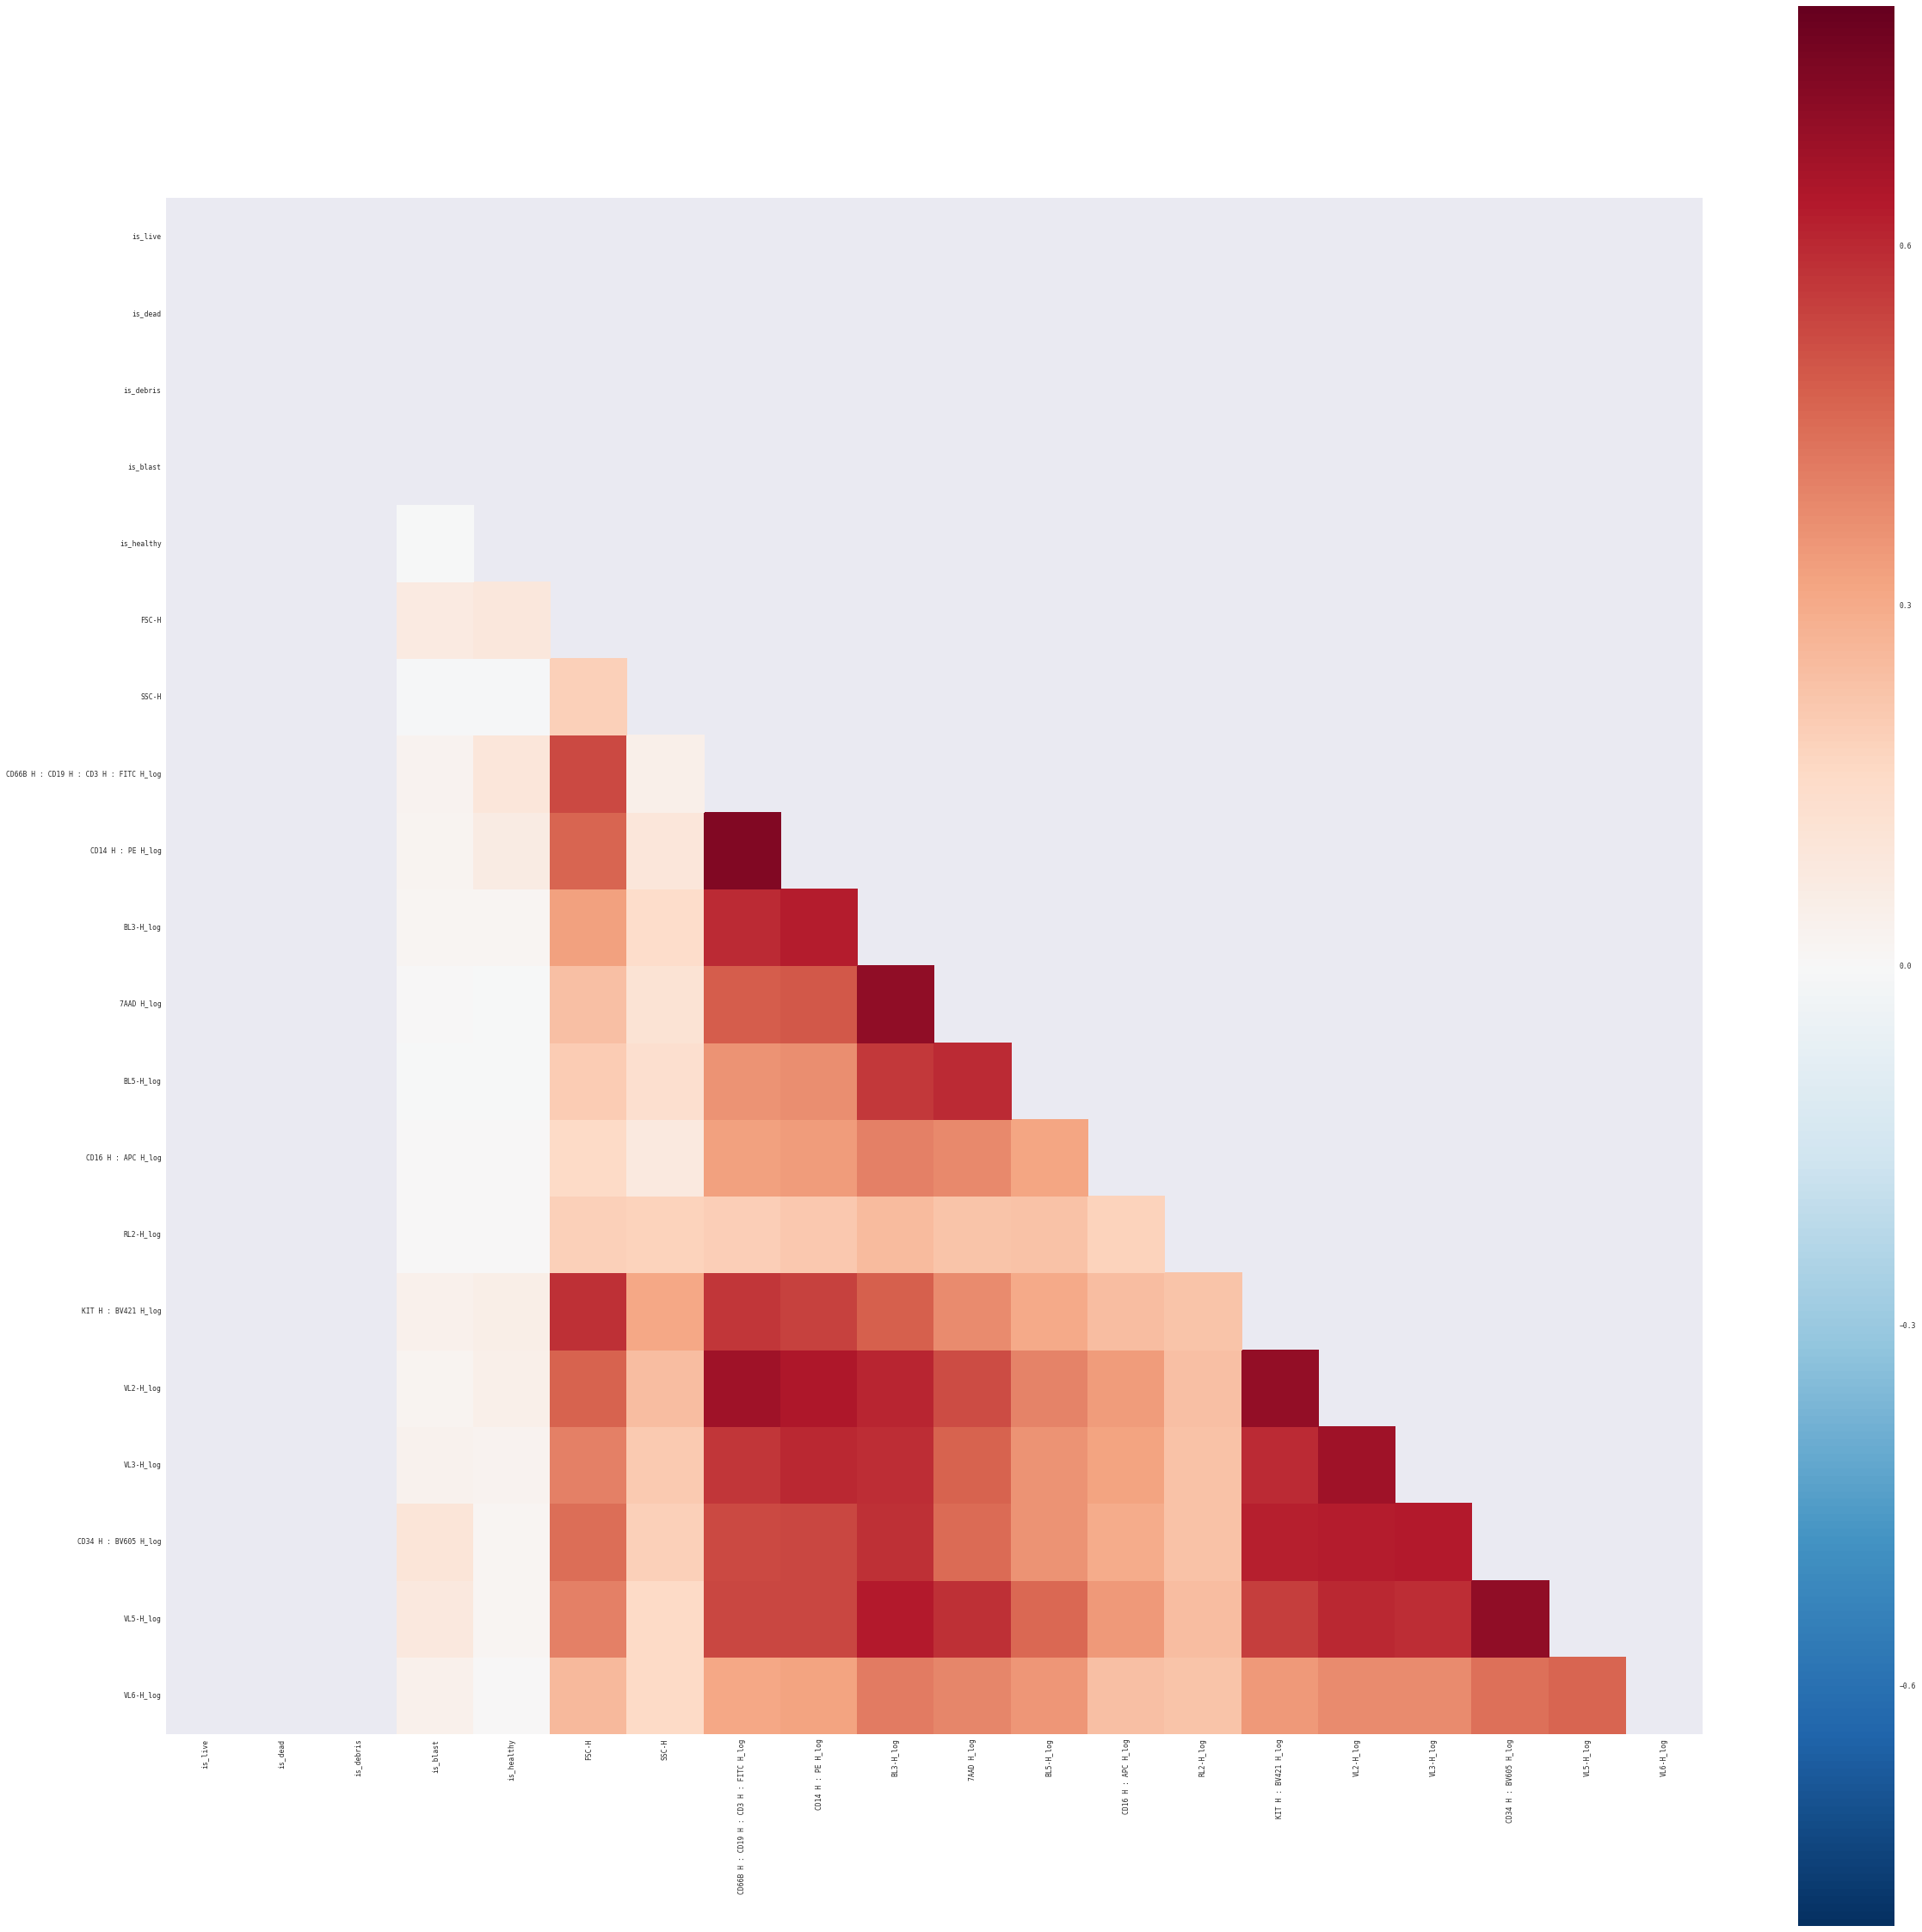

In [432]:
# Load the datset of correlations between cortical brain networks
corrmat = ld[logcols].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))


mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, mask=mask)


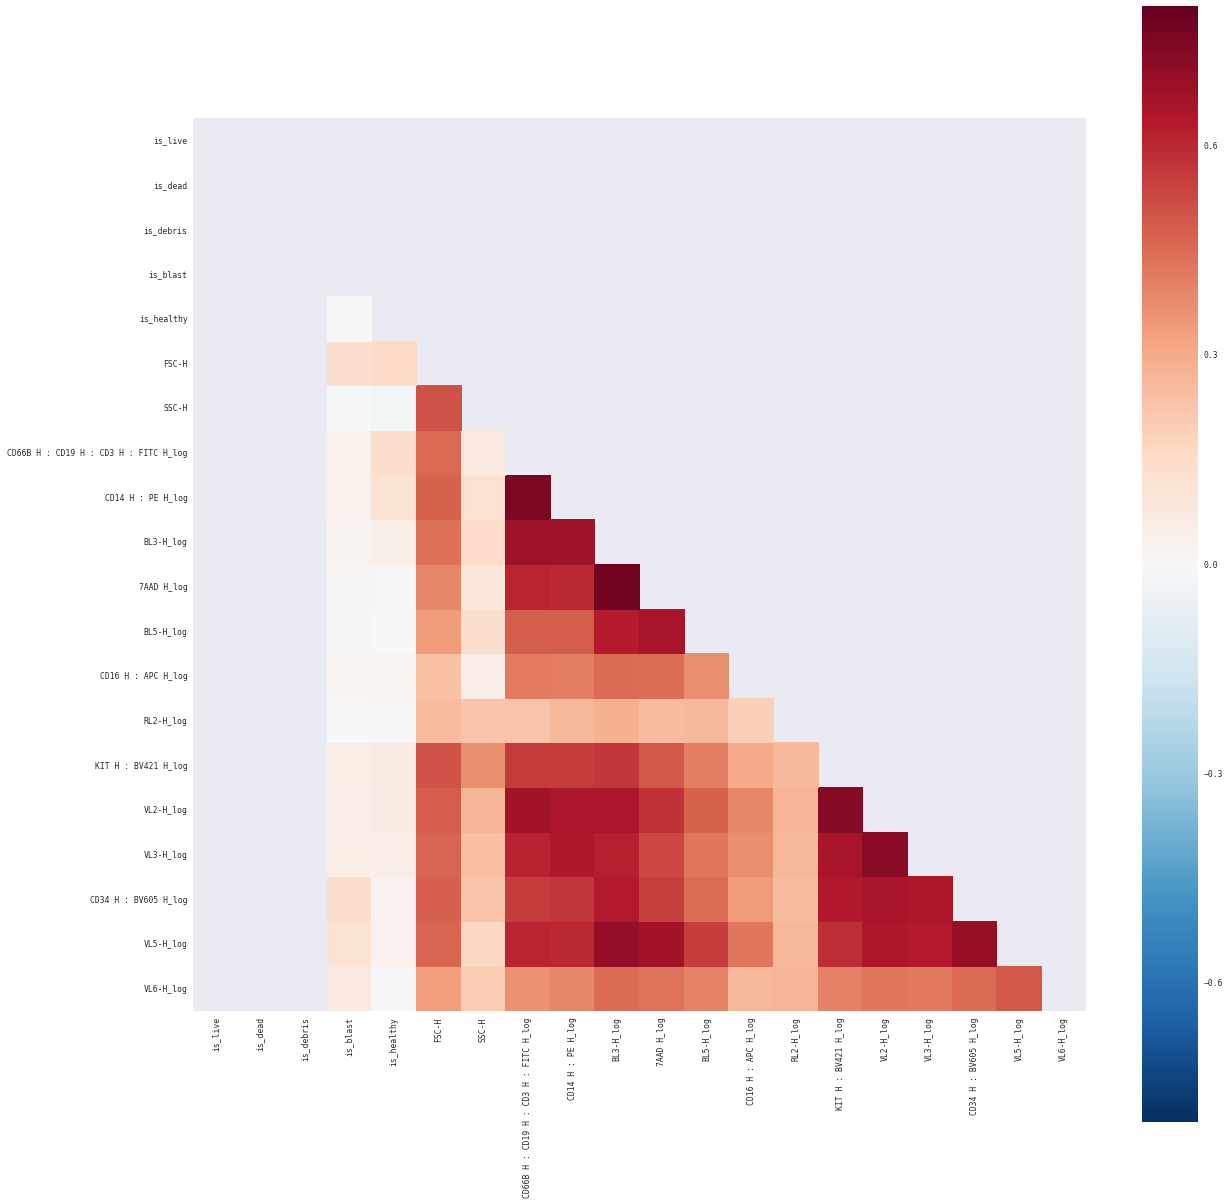

In [433]:
ld_subset = ld.loc[(ld.screen_number==screenTarget)&(ld.well_number==wellTarget)]

# Load the datset of correlations between cortical brain networks
corrmat = ld_subset[logcols].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))


mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, mask=mask)


In [434]:
x=corrmat[["is_blast"]]
#x.sort_index(by=['is_blast'], ascending=[False])
x = x.sort_values('is_blast')
x


,is_blast
SSC-H,-0.005832
is_healthy,-0.005519
RL2-H_log,-0.000726
BL5-H_log,0.006461
7AAD H_log,0.010011
CD16 H : APC H_log,0.014378
BL3-H_log,0.026748
CD14 H : PE H_log,0.039841
CD66B H : CD19 H : CD3 H : FITC H_log,0.043510
VL2-H_log,0.050207


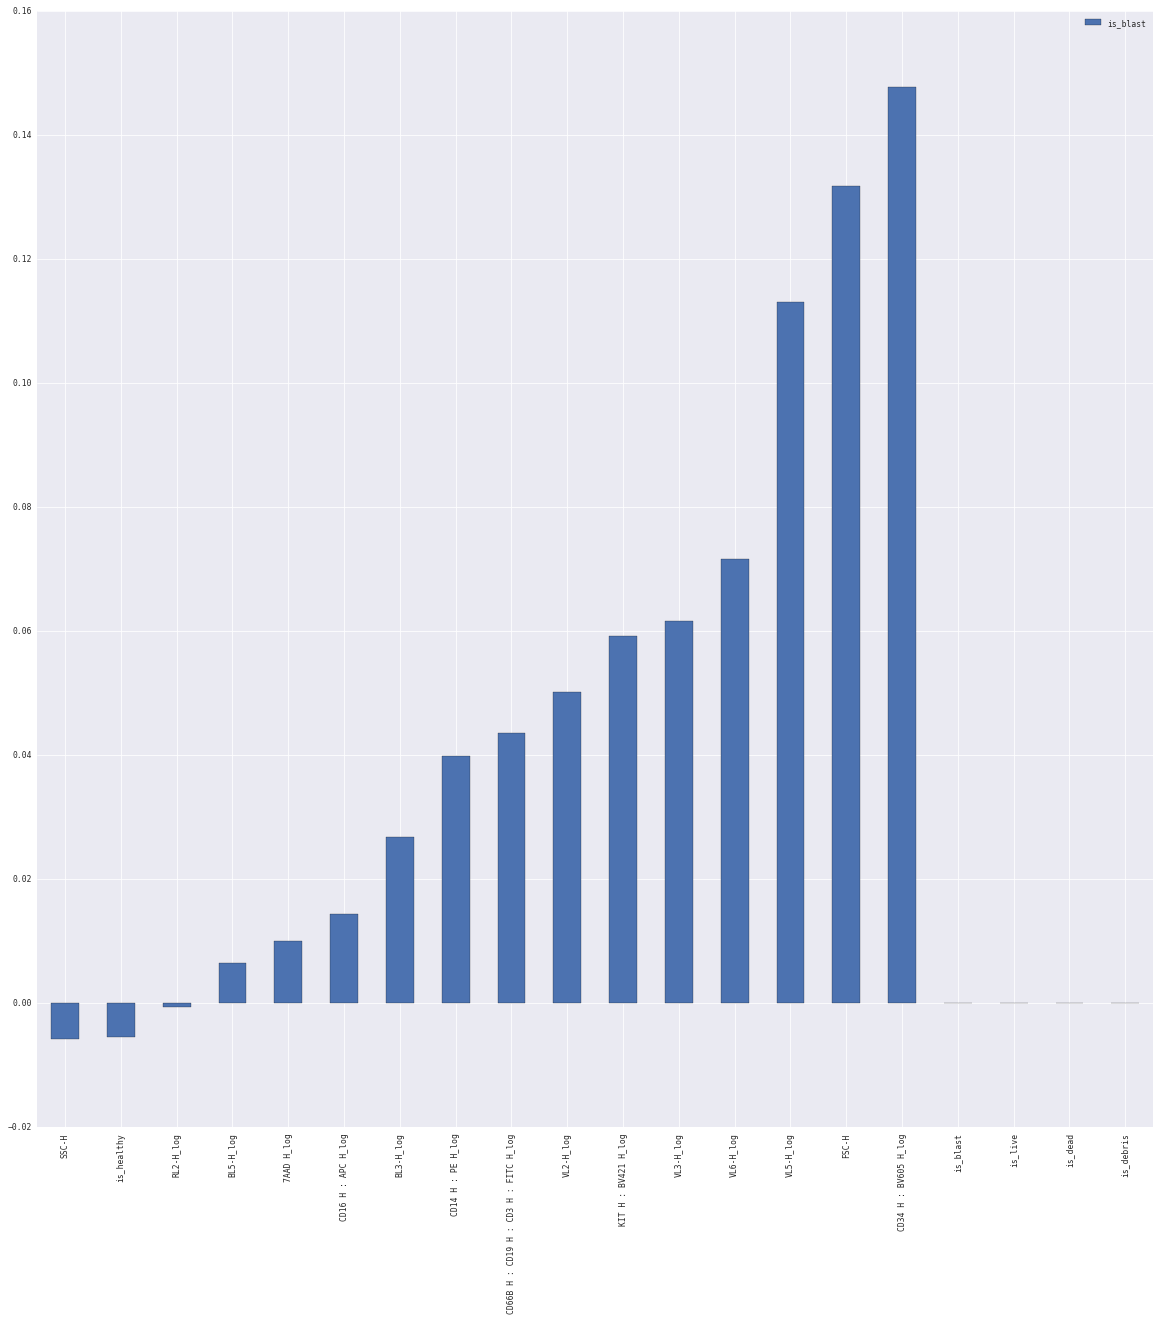

In [435]:

x[x<1].plot(figsize=(20, 20),kind="bar")

In [436]:
colsOfInterest = ["CD34 H : BV605 H_log","VL5-H_log", "FSC-H_scaled",] #"KIT H : BV421 H_log"]
colsOfInterest2 = colsOfInterest
plotme = ld_subset[colsOfInterest]


In [81]:
#processing.scale_data(plotme,colsOfInterest,overwrite=True)

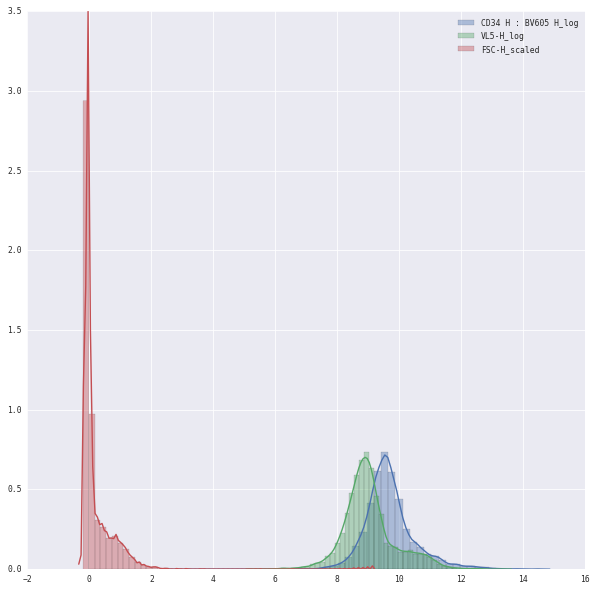

In [438]:

f, ax = plt.subplots(figsize=(10, 10))

sns.distplot(plotme[[0]], label = plotme.columns.values[0])
sns.distplot(plotme[[1]],label = plotme.columns.values[1])
sns.distplot(plotme[[2]],label = plotme.columns.values[2])
#sns.distplot(plotme[[3]],label = plotme.columns.values[3])
plt.legend();
#plt.ylim([0,.000004])
#plt.xlim([-1,1])


In [83]:
#processing.scale_data(ld_subset,["KIT H : BV421 H_log"],overwrite=False)

In [84]:
#sns.distplot(ld_subset["KIT H : BV421 H_log_scaled"], label = "FSC-H")
#sns.distplot(ld_subset["KIT H : BV421 H_log"], label = "FSC-H")


#  Clean the Data


# LABELED

In [440]:
#all of the lasers + scatter
colsOfInterest = labeled_comp_data.filter(regex='log').columns.values
colsOfInterest[colsOfInterest =='FSC-H_log'] = 'FSC-H_scaled'
colsOfInterest[colsOfInterest =='SSC-H_log'] = 'SSC-H_scaled'


#all of the lasers, no scatter
colsOfInterestFlow = colsOfInterest
i= np.where(colsOfInterestFlow=='SSC-H')
colsOfInterestFlow = np.delete(colsOfInterestFlow,i)
i= np.where(colsOfInterestFlow=='FSC-H')
colsOfInterestFlow = np.delete(colsOfInterestFlow,i)
colsOfInterestFlow
#colsOfInterestFlow = temp.filter(regex='log').columns.values


#most correlated lasers 
colsOfInterestSub = ["CD34 H : BV605 H_log","VL5-H_log"] #, "FSC-H","KIT H : BV421 H_log"]
colsOfInterestSubFlow = ["CD34 H : BV605 H_log","VL5-H_log"] #,"KIT H : BV421 H_log"]

#scatter only 
colsOfScatter = type_relevant_columns
colsOfScatter
colsOfInterest

array(['FSC-H_scaled', 'SSC-H_scaled',
       u'CD66B H : CD19 H : CD3 H : FITC H_log', u'CD14 H : PE H_log',
       u'BL3-H_log', u'7AAD H_log', u'BL5-H_log', u'CD16 H : APC H_log',
       u'RL2-H_log', u'KIT H : BV421 H_log', u'VL2-H_log', u'VL3-H_log',
       u'CD34 H : BV605 H_log', u'VL5-H_log', u'VL6-H_log'], dtype=object)

In [441]:
labeled_plots = plotting.pairwise_plots(subset, colsOfInterest, 'cell_type', opacity=.5)
#for p in labeled_plots: iplot(p)

In [87]:
labeled_plots = plotting.pairwise_plots(labeled_comp_data, colsOfInterest, 'cell_type', max_points=int(len(labeled_data)**.75), opacity=.5)
#for p in labeled_plots: iplot(p)

# K MEANS

In [460]:
def k_means_optimized(testdata, n_clusters_range=range(3,12), scale=True):
    '''Returns trained k-means model that optimizes silhouette score
    
    Args:
        data (ndarray): data to cluster
        n_clusters_range (iterable of ints): values of n_clusters (k) to try
        
    Returns:
        fitted sklearn.cluster.KMeans
    '''
    if scale:
        scaler = StandardScaler()
        testdata = scaler.fit_transform(testdata)
    scores = {} # scores mapped to n_clusters (float --> int)
    for n_clusters in n_clusters_range:
        model = KMeans(n_clusters=n_clusters)
        model.fit(testdata)
        score = silhouette_score(testdata, model.labels_, sample_size=2000+int(testdata.shape[0]**.5))
        #score = silhouette_score(testdata, model.labels_)
        del model
        scores[score] = n_clusters
    best_score = max(scores.keys())
    best_n_clusters = scores[best_score]
    best_model = KMeans(n_clusters=best_n_clusters)
    best_model.fit(testdata)
    return best_model, scores



KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
{0.20991451: 3, 0.20772448: 4, 0.15744759: 7, 0.1270178: 9, 0.1597112: 6, 0.1540107031420927: 8, 0.17494187: 5}


/Users/jorie/anaconda/envs/insight_env/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



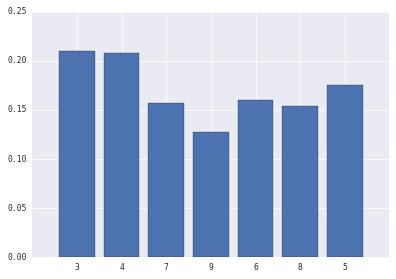

KMEANS DAD NMI: 0.137100402579


FSC-H  SSC-H  CD66B H : CD19 H : CD3 H : FITC H  \
cell_type kmeans_temp                                                    
blast     1               19     19                                 19   
          2                6      6                                  6   
healthy   0               11     11                                 11   
          1               11     11                                 11   
          2               17     17                                 17   

                       CD14 H : PE H  BL3-H  7AAD H  BL5-H  CD16 H : APC H  \
cell_type kmeans_temp                                                        
blast     1                       19     19      19     19              19   
          2                        6      6       6      6               6   
healthy   0                       11     11      11     11              11   
          1                       11     11      11     11              11   
          2                       17     17      17     17              17   

                       RL2-H  KIT H : BV421 H    ...      7AAD H_log  \
cell_type kmeans_temp                            ...                   
blast     1               19               19    ...              19   
          2                6                6    ...               6   
healthy   0               11               11    ...              11   
          1               11               11    ...              11   
          2               17               17    ...              17   

                       BL5-H_log  CD16 H : APC H_log  RL2-H_log  \
cell_type kmeans_temp                                             
blast     1                   19                  19         19   
          2                    6                   6          6   
healthy   0                   11                  11         11   
          1                   11                  11         11   
          2                   17                  17         17   

                       KIT H : BV421 H_log  VL2-H_log  VL3-H_log  \
cell_type kmeans_temp                                              
blast     1                             19         19         19   
          2                              6          6          6   
healthy   0                             11         11         11   
          1                             11         11         11   
          2                             17         17         17   

                       CD34 H : BV605 H_log  VL5-H_log  VL6-H_log  
cell_type kmeans_temp                                              
blast     1                              19         19         19  
          2                               6          6          6  
healthy   0                              11         11         11  
          1                              11         11         11  
          2                              17         17         17  

[5 rows x 74 columns]

In [447]:
#check out just the target cells 
#d[(d['x']>2) & (d['y']>7)]
temp = subset[(subset['cell_type']=="blast") | (subset['cell_type']=="healthy")]
kmeans_temp, scores_temp = k_means_optimized(temp[colsOfInterest].as_matrix(),scale=True)    

temp['kmeans_temp'] = kmeans_temp.labels_
print kmeans_temp
print scores_temp
plt.bar(range(len(scores_temp)), scores_temp.keys(), align='center')
plt.xticks(range(len(scores_temp)), scores_temp.values())

plt.show()
print 'KMEANS DAD NMI:', adjusted_mutual_info_score(temp['cell_type'], kmeans_temp.labels_)
temp.groupby(['cell_type',"kmeans_temp"]).count()


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
{0.20991451: 3, 0.20772448: 4, 0.15744759: 7, 0.1270178: 9, 0.1597112: 6, 0.1540107031420927: 8, 0.17494187: 5}


/Users/jorie/anaconda/envs/insight_env/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



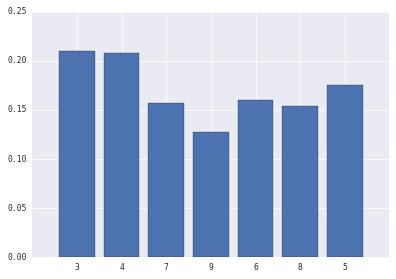

KMEANS DAD NMI: 0.816813774788


FSC-H  SSC-H  CD66B H : CD19 H : CD3 H : FITC H  \
cell_type kmeans_temp2                                                    
blast     1                25     25                                 25   
healthy   0                37     37                                 37   
          1                 2      2                                  2   

                        CD14 H : PE H  BL3-H  7AAD H  BL5-H  CD16 H : APC H  \
cell_type kmeans_temp2                                                        
blast     1                        25     25      25     25              25   
healthy   0                        37     37      37     37              37   
          1                         2      2       2      2               2   

                        RL2-H  KIT H : BV421 H     ...       BL5-H_log  \
cell_type kmeans_temp2                             ...                   
blast     1                25               25     ...              25   
healthy   0                37               37     ...              37   
          1                 2                2     ...               2   

                        CD16 H : APC H_log  RL2-H_log  KIT H : BV421 H_log  \
cell_type kmeans_temp2                                                       
blast     1                             25         25                   25   
healthy   0                             37         37                   37   
          1                              2          2                    2   

                        VL2-H_log  VL3-H_log  CD34 H : BV605 H_log  VL5-H_log  \
cell_type kmeans_temp2                                                          
blast     1                    25         25                    25         25   
healthy   0                    37         37                    37         37   
          1                     2          2                     2          2   

                        VL6-H_log  kmeans_temp  
cell_type kmeans_temp2                          
blast     1                    25           25  
healthy   0                    37           37  
          1                     2            2  

[3 rows x 75 columns]

In [448]:
#check out just the target cells forced k=2
kmeans_temp = KMeans(2)
kmeans_temp.fit(temp[colsOfInterestFlow].as_matrix())
temp['kmeans_temp2'] = kmeans_temp.labels_
print kmeans_temp
print scores_temp
plt.bar(range(len(scores_temp)), scores_temp.keys(), align='center')
plt.xticks(range(len(scores_temp)), scores_temp.values())

plt.show()
print 'KMEANS DAD NMI:', adjusted_mutual_info_score(temp['cell_type'], kmeans_temp.labels_)
temp.groupby(['cell_type',"kmeans_temp2"]).count()


['CD34 H : BV605 H_log', 'VL5-H_log']

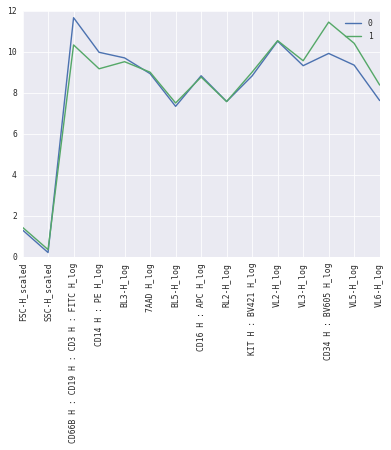

In [449]:
plt.plot(kmeans_temp.cluster_centers_[0],label="0")
plt.plot(kmeans_temp.cluster_centers_[1],label="1")
#plt.plot(kmeans_temp.cluster_centers_[2],label="2")
plt.legend()
plt.xticks(range(0,len(colsOfInterestFlow)), colsOfInterestFlow, rotation='vertical')
colsOfInterestSub

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
{0.55573934: 3}


/Users/jorie/anaconda/envs/insight_env/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



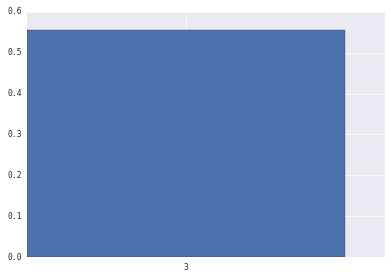

KMEANS DAD NMI: 0.0412327564912


FSC-H  SSC-H  CD66B H : CD19 H : CD3 H : FITC H  \
cell_type kmeans_DAD                                                    
blast     0               1      1                                  1   
          2              24     24                                 24   
healthy   2              39     39                                 39   
nontarget 0            4733   4733                               4733   
          1              18     18                                 18   
          2             875    875                                875   

                      CD14 H : PE H  BL3-H  7AAD H  BL5-H  CD16 H : APC H  \
cell_type kmeans_DAD                                                        
blast     0                       1      1       1      1               1   
          2                      24     24      24     24              24   
healthy   2                      39     39      39     39              39   
nontarget 0                    4733   4733    4733   4733            4733   
          1                      18     18      18     18              18   
          2                     875    875     875    875             875   

                      RL2-H  KIT H : BV421 H    ...      7AAD H_log  \
cell_type kmeans_DAD                            ...                   
blast     0               1                1    ...               1   
          2              24               24    ...              24   
healthy   2              39               39    ...              39   
nontarget 0            4733             4733    ...            4733   
          1              18               18    ...              18   
          2             875              875    ...             875   

                      BL5-H_log  CD16 H : APC H_log  RL2-H_log  \
cell_type kmeans_DAD                                             
blast     0                   1                   1          1   
          2                  24                  24         24   
healthy   2                  39                  39         39   
nontarget 0                4733                4733       4733   
          1                  18                  18         18   
          2                 875                 875        875   

                      KIT H : BV421 H_log  VL2-H_log  VL3-H_log  \
cell_type kmeans_DAD                                              
blast     0                             1          1          1   
          2                            24         24         24   
healthy   2                            39         39         39   
nontarget 0                          4733       4733       4733   
          1                            18         18         18   
          2                           875        875        875   

                      CD34 H : BV605 H_log  VL5-H_log  VL6-H_log  
cell_type kmeans_DAD                                              
blast     0                              1          1          1  
          2                             24         24         24  
healthy   2                             39         39         39  
nontarget 0                           4733       4733       4733  
          1                             18         18         18  
          2                            875        875        875  

[6 rows x 74 columns]

In [452]:
#cluster DAD
kmeans_DAD, scores_DAD = k_means_optimized(subset[colsOfScatter].as_matrix())    
    
    
#how did we do at DAD?
subset['kmeans_DAD'] = kmeans_DAD.labels_
print kmeans_DAD
print scores_DAD
plt.bar(range(len(scores_DAD)), scores_DAD.keys(), align='center')
plt.xticks(range(len(scores_DAD)), scores_DAD.values())

plt.show()
print 'KMEANS DAD NMI:', adjusted_mutual_info_score(subset['cell_type'], kmeans_DAD.labels_)
subset.groupby(['cell_type',"kmeans_DAD"]).count()



In [453]:
x = subset.groupby(['cell_type',"kmeans_DAD"]).mean()
x[colsOfInterest]

FSC-H_scaled  SSC-H_scaled  \
cell_type kmeans_DAD                               
blast     0               0.581981     -0.300437   
          2               1.432614      0.389540   
healthy   2               1.343956      0.210429   
nontarget 0              -0.012780      0.351099   
          1               6.103409     14.499643   
          2               1.040646      0.731299   

                      CD66B H : CD19 H : CD3 H : FITC H_log  \
cell_type kmeans_DAD                                          
blast     0                                        9.740086   
          2                                       10.288918   
healthy   2                                       11.676738   
nontarget 0                                        9.196498   
          1                                       12.166729   
          2                                       10.732953   

                      CD14 H : PE H_log  BL3-H_log  7AAD H_log  BL5-H_log  \
cell_type kmeans_DAD                                                        
blast     0                    9.010669  10.130464    9.558247   7.569928   
          2                    9.156152   9.515923    9.026822   7.526640   
healthy   2                    9.980479   9.710320    8.940693   7.357320   
nontarget 0                    8.322968   8.944821    8.611476   7.255122   
          1                   11.305402  11.229617   10.312159   9.417101   
          2                    9.576653  10.190351   10.183179   8.307996   

                      CD16 H : APC H_log  RL2-H_log  KIT H : BV421 H_log  \
cell_type kmeans_DAD                                                       
blast     0                     9.600963   7.404888             7.684324   
          2                     8.784333   7.590858             9.035502   
healthy   2                     8.827501   7.594716             8.882673   
nontarget 0                     8.615370   7.537449             7.984888   
          1                     9.098692   9.593742            10.705181   
          2                     9.053096   7.831377             9.167897   

                      VL2-H_log  VL3-H_log  CD34 H : BV605 H_log  VL5-H_log  \
cell_type kmeans_DAD                                                          
blast     0           10.866986   9.764283             10.534945   9.894195   
          2           10.509873   9.562898             11.552606  10.502745   
healthy   2           10.568450   9.363264              9.993216   9.396695   
nontarget 0            9.763651   8.765840              9.496294   8.841531   
          1           11.302594  10.413622             11.591280  10.517969   
          2           10.843431   9.688174             10.570508   9.994098   

                      VL6-H_log  
cell_type kmeans_DAD             
blast     0            8.271293  
          2            8.409516  
healthy   2            7.673185  
nontarget 0            7.618843  
          1            9.182672  
          2            8.160006

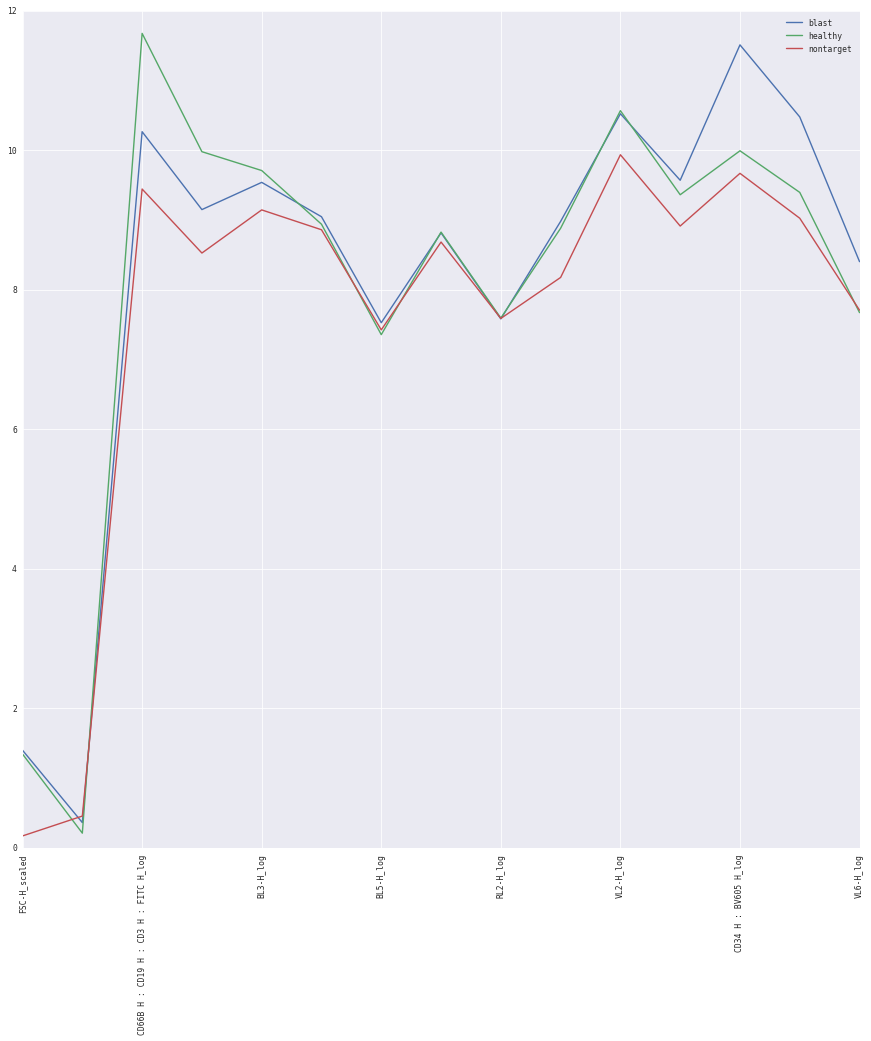

In [454]:
f, ax = plt.subplots(figsize=(15, 15))
x = subset.groupby(['cell_type']).mean()
y = x[colsOfInterest]
a = y.iloc[0,:]
b = y.iloc[1,:]
c = y.iloc[2,:]
a.plot(label="blast",rot=0)
b.plot(label="healthy")
c.plot(label="nontarget",rot=90)
plt.xlabel = colsOfInterest
plt.legend()


array(['FSC-H_scaled', 'SSC-H_scaled',
       u'CD66B H : CD19 H : CD3 H : FITC H_log', u'CD14 H : PE H_log',
       u'BL3-H_log', u'7AAD H_log', u'BL5-H_log', u'CD16 H : APC H_log',
       u'RL2-H_log', u'KIT H : BV421 H_log', u'VL2-H_log', u'VL3-H_log',
       u'CD34 H : BV605 H_log', u'VL5-H_log', u'VL6-H_log'], dtype=object)

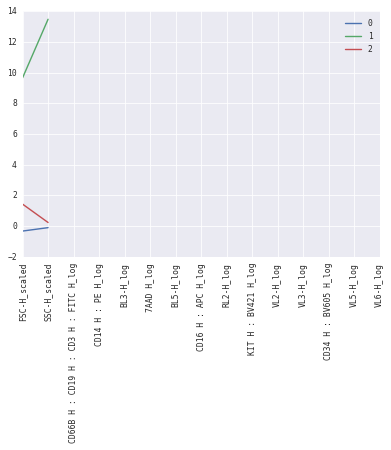

In [455]:
# plot DAD
plt.plot(kmeans_DAD.cluster_centers_[0],label="0")
plt.plot(kmeans_DAD.cluster_centers_[1],label="1")
plt.plot(kmeans_DAD.cluster_centers_[2],label="2")
#plt.plot(kmeans_DAD.cluster_centers_[3],label="3")
plt.xticks(range(0,len(colsOfInterest)), colsOfInterest, rotation='vertical')
plt.legend()
colsOfInterest

In [456]:
#now get just the remaining  get only good cells -- cluster TYPE 
x = subset.groupby(['cell_type',"kmeans_DAD"]).count()
subset_TYPE = subset[subset['kmeans_DAD']==2]

In [457]:
#now cluster just the remaining 
kmeans_TYPE, scores_TYPE = k_means_optimized(subset_TYPE[colsOfInterestFlow].as_matrix())


In [458]:
colsOfInterestSubFlow


['CD34 H : BV605 H_log', 'VL5-H_log']

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
{0.19453786: 3}
KMEANS TYPE NMI: 0.018564593108


/Users/jorie/anaconda/envs/insight_env/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



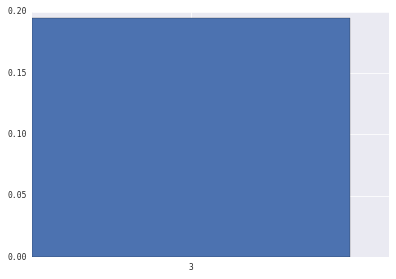

FSC-H  SSC-H  CD66B H : CD19 H : CD3 H : FITC H  \
cell_type kmeans_TYPE                                                    
blast     0                7      7                                  7   
          1               17     17                                 17   
healthy   0               17     17                                 17   
          1               22     22                                 22   
nontarget 0              256    256                                256   
          1              373    373                                373   
          2              246    246                                246   

                       CD14 H : PE H  BL3-H  7AAD H  BL5-H  CD16 H : APC H  \
cell_type kmeans_TYPE                                                        
blast     0                        7      7       7      7               7   
          1                       17     17      17     17              17   
healthy   0                       17     17      17     17              17   
          1                       22     22      22     22              22   
nontarget 0                      256    256     256    256             256   
          1                      373    373     373    373             373   
          2                      246    246     246    246             246   

                       RL2-H  KIT H : BV421 H     ...      BL5-H_log  \
cell_type kmeans_TYPE                             ...                  
blast     0                7                7     ...              7   
          1               17               17     ...             17   
healthy   0               17               17     ...             17   
          1               22               22     ...             22   
nontarget 0              256              256     ...            256   
          1              373              373     ...            373   
          2              246              246     ...            246   

                       CD16 H : APC H_log  RL2-H_log  KIT H : BV421 H_log  \
cell_type kmeans_TYPE                                                       
blast     0                             7          7                    7   
          1                            17         17                   17   
healthy   0                            17         17                   17   
          1                            22         22                   22   
nontarget 0                           256        256                  256   
          1                           373        373                  373   
          2                           246        246                  246   

                       VL2-H_log  VL3-H_log  CD34 H : BV605 H_log  VL5-H_log  \
cell_type kmeans_TYPE                                                          
blast     0                    7          7                     7          7   
          1                   17         17                    17         17   
healthy   0                   17         17                    17         17   
          1                   22         22                    22         22   
nontarget 0                  256        256                   256        256   
          1                  373        373                   373        373   
          2                  246        246                   246        246   

                       VL6-H_log  kmeans_DAD  
cell_type kmeans_TYPE                         
blast     0                    7           7  
          1                   17          17  
healthy   0                   17          17  
          1                   22          22  
nontarget 0                  256         256  
          1                  373         373  
          2                  246         246  

[7 rows x 75 columns]

In [459]:
#how did it do? 
subset_TYPE['kmeans_TYPE'] = kmeans_TYPE.labels_
print kmeans_TYPE
print scores_TYPE
plt.bar(range(len(scores_TYPE)), scores_TYPE.keys(), align='center')
plt.xticks(range(len(scores_TYPE)), scores_TYPE.values())

print 'KMEANS TYPE NMI:', adjusted_mutual_info_score(subset_TYPE['cell_type'], kmeans_TYPE.labels_)
plt.show()
subset_TYPE.groupby(['cell_type',"kmeans_TYPE"]).count()



In [423]:
kmeans_TYPE.cluster_centers_[0]

array([-0.48688217, -0.48627865, -0.58345044, -0.62404707, -0.53587485,
       -0.49950881,  0.13681545,  0.22844237,  0.25348346, -0.51569329,
       -0.6544298 , -0.71159032, -0.57516433, -0.57089773,  0.04054955])

array(['FSC-H_scaled', 'SSC-H_scaled',
       u'CD66B H : CD19 H : CD3 H : FITC H_log', u'CD14 H : PE H_log',
       u'BL3-H_log', u'7AAD H_log', u'BL5-H_log', u'CD16 H : APC H_log',
       u'RL2-H_log', u'KIT H : BV421 H_log', u'VL2-H_log', u'VL3-H_log',
       u'CD34 H : BV605 H_log', u'VL5-H_log', u'VL6-H_log'], dtype=object)

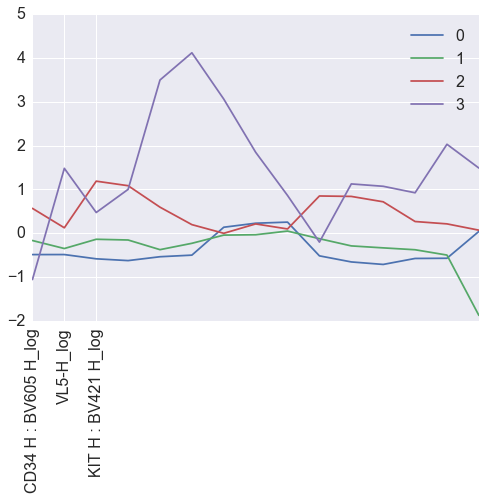

In [424]:
plt.plot(kmeans_TYPE.cluster_centers_[0],label="0")
plt.plot(kmeans_TYPE.cluster_centers_[1],label="1")
plt.plot(kmeans_TYPE.cluster_centers_[2],label="2")
plt.plot(kmeans_TYPE.cluster_centers_[3],label="3")
#plt.plot(kmeans_TYPE.cluster_centers_[4],label="4")
plt.xticks(range(0,len(colsOfInterestSubFlow)), colsOfInterestSubFlow, rotation='vertical')
plt.legend()
colsOfInterest

/Users/jorie/anaconda/envs/insight_env/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
{0.19336724: 3, 0.20951928: 4, 0.16668962: 7, 0.18303049: 6, 0.16441824: 9, 0.19381826: 5, 0.15313834: 11, 0.16177674: 10, 0.16852686: 8}
KMEANS TYPE NMI: 0.0232791680951


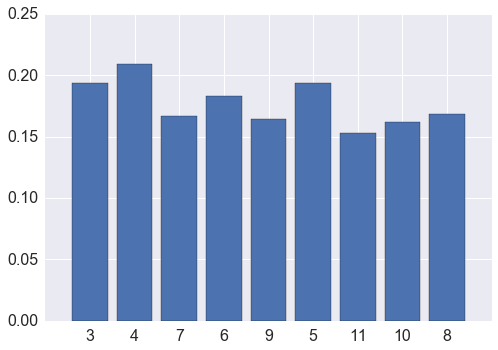

FSC-H  SSC-H  CD66B H : CD19 H : CD3 H : FITC H  \
cell_type kmeans_TYPE                                                    
blast     0               18     18                                 18   
          3                6      6                                  6   
healthy   0               22     22                                 22   
          3               17     17                                 17   
nontarget 0              308    308                                308   
          1              293    293                                293   
          2               18     18                                 18   
          3              256    256                                256   

                       CD14 H : PE H  BL3-H  7AAD H  BL5-H  CD16 H : APC H  \
cell_type kmeans_TYPE                                                        
blast     0                       18     18      18     18              18   
          3                        6      6       6      6               6   
healthy   0                       22     22      22     22              22   
          3                       17     17      17     17              17   
nontarget 0                      308    308     308    308             308   
          1                      293    293     293    293             293   
          2                       18     18      18     18              18   
          3                      256    256     256    256             256   

                       RL2-H  KIT H : BV421 H      ...        \
cell_type kmeans_TYPE                              ...         
blast     0               18               18      ...         
          3                6                6      ...         
healthy   0               22               22      ...         
          3               17               17      ...         
nontarget 0              308              308      ...         
          1              293              293      ...         
          2               18               18      ...         
          3              256              256      ...         

                       CD16 H : APC H_log  RL2-H_log  KIT H : BV421 H_log  \
cell_type kmeans_TYPE                                                       
blast     0                            18         18                   18   
          3                             6          6                    6   
healthy   0                            22         22                   22   
          3                            17         17                   17   
nontarget 0                           308        308                  308   
          1                           293        293                  293   
          2                            18         18                   18   
          3                           256        256                  256   

                       VL2-H_log  VL3-H_log  CD34 H : BV605 H_log  VL5-H_log  \
cell_type kmeans_TYPE                                                          
blast     0                   18         18                    18         18   
          3                    6          6                     6          6   
healthy   0                   22         22                    22         22   
          3                   17         17                    17         17   
nontarget 0                  308        308                   308        308   
          1                  293        293                   293        293   
          2                   18         18                    18         18   
          3                  256        256                   256        256   

                       VL6-H_log  kmeans_DAD  cell_type_num  
cell_type kmeans_TYPE                                        
blast     0                   18          18             18  
          3                    6           6              6  
healthy   0                   22        

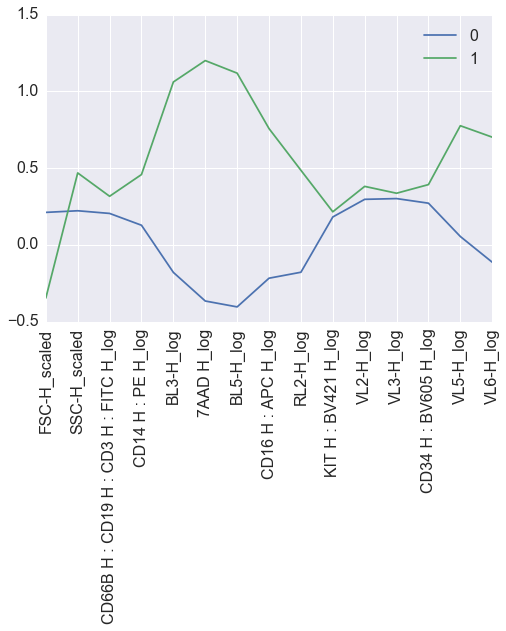

In [469]:
#now cluster just the remaining 
#now get just the remaining  get only good cells -- cluster TYPE 
x = subset.groupby(['cell_type',"kmeans_DAD"]).count()
subset_TYPE = subset[subset['kmeans_DAD']==2]

kmeans_TYPE, scores_TYPE = k_means_optimized(subset_TYPE[colsOfInterestFlow].as_matrix())

#how did it do? 
subset_TYPE['kmeans_TYPE'] = kmeans_TYPE.labels_
print kmeans_TYPE
print scores_TYPE
plt.bar(range(len(scores_TYPE)), scores_TYPE.keys(), align='center')
plt.xticks(range(len(scores_TYPE)), scores_TYPE.values())

print 'KMEANS TYPE NMI:', adjusted_mutual_info_score(subset_TYPE['cell_type'], kmeans_TYPE.labels_)
plt.show()



plt.plot(kmeans_TYPE.cluster_centers_[0],label="0")
plt.plot(kmeans_TYPE.cluster_centers_[1],label="1")
#plt.plot(kmeans_TYPE.cluster_centers_[2],label="2")
#plt.plot(kmeans_TYPE.cluster_centers_[3],label="3")
#plt.plot(kmeans_TYPE.cluster_centers_[4],label="4")
plt.xticks(range(0,len(colsOfInterestFlow)), colsOfInterestFlow, rotation='vertical')
plt.legend()
subset_TYPE.groupby(['cell_type',"kmeans_TYPE"]).count()
#subset_TYPE.groupby(['cell_type',"kmeans_TYPE"]).mean()


([<matplotlib.axis.YTick at 0x1d629f590>,
 <a list of 15 Text yticklabel objects>)

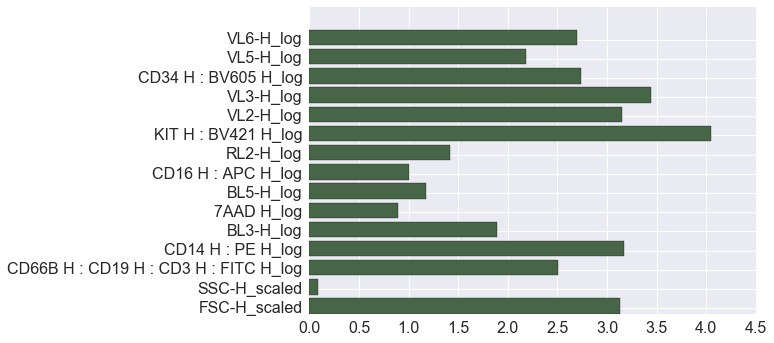

In [470]:
z = 2
index = np.array(range(0,len(colsOfInterestFlow)))
plt.barh(index,kmeans_TYPE.cluster_centers_[z],label="z", color=cmap[z])
plt.yticks(index+ .3, colsOfInterest)
#plt.plot(kmeans_TYPE.cluster_centers_[1],label="1")
#plt.plot(kmeans_TYPE.cluster_centers_[2],label="2")
#plt.plot(kmeans_TYPE.cluster_centers_[3],label="3")
#plt.plot(kmeans_TYPE.cluster_centers_[4],label="4")
#plt.yticks(range(0,len(colsOfInterestFlow))+.25, colsOfInterestFlow, rotation='horizontal')
#plt.legend()
#subset_TYPE.groupby(['cell_type',"kmeans_TYPE"]).count()
#subset_TYPE.groupby(['cell_type',"kmeans_TYPE"]).mean()


In [398]:
index[:] + .25


TypeError: can only concatenate list (not "float") to list

In [373]:
kmeans_TYPE.cluster_centers_[0]

array([ 0.74478028,  1.90489629,  1.40217758,  1.62038621,  1.97775578,
        1.66324386,  1.04207045,  0.81271965,  0.4979852 ,  1.29848386,
        1.80690339,  1.67807622,  1.14537344,  1.33326441,  0.93158934])

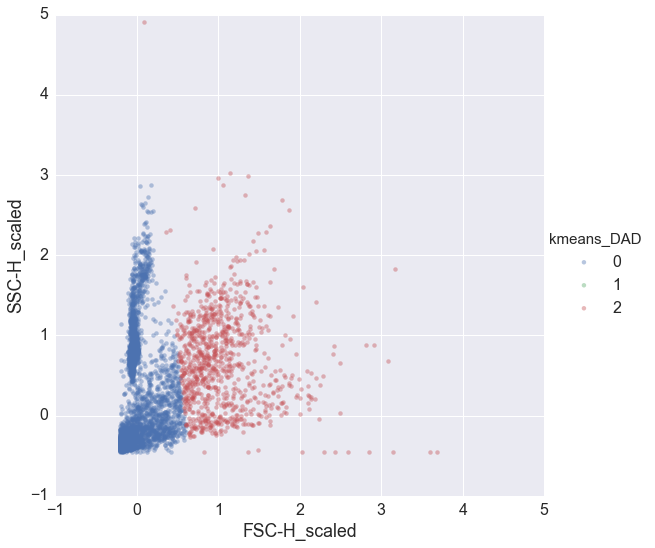

In [464]:
sns.set(font_scale=1.6)
subset.loc[subset['cell_type'] =="blast" ,'cell_type_num'] = 1
subset.loc[subset['cell_type'] =="healthy" ,'cell_type_num'] = 2
subset.loc[subset['cell_type'] =="nontarget" ,'cell_type_num'] = 3

g = sns.lmplot('FSC-H_scaled', 'SSC-H_scaled', data=subset, hue="kmeans_DAD", legend=True, fit_reg=False,scatter_kws={'alpha':0.4},size=8)
g.set(ylim=(-1, 5))
g.set(xlim=(-1, 5))
#from scipy.cluster.hierarchy import dendrogram, linkage
#X = subset[colsOfInterestSubFlow].as_matrix()
#plt.scatter(X[:,0], X[:,1],c=subset['cell_type_num'], cmap=["blue","red","green"])
#plt.show()
#colsOfInterestSubFlow



In [341]:
colsOfInterest


array(['FSC-H_scaled', 'SSC-H_scaled',
       u'CD66B H : CD19 H : CD3 H : FITC H_log', u'CD14 H : PE H_log',
       u'BL3-H_log', u'7AAD H_log', u'BL5-H_log', u'CD16 H : APC H_log',
       u'RL2-H_log', u'KIT H : BV421 H_log', u'VL2-H_log', u'VL3-H_log',
       u'CD34 H : BV605 H_log', u'VL5-H_log', u'VL6-H_log'], dtype=object)

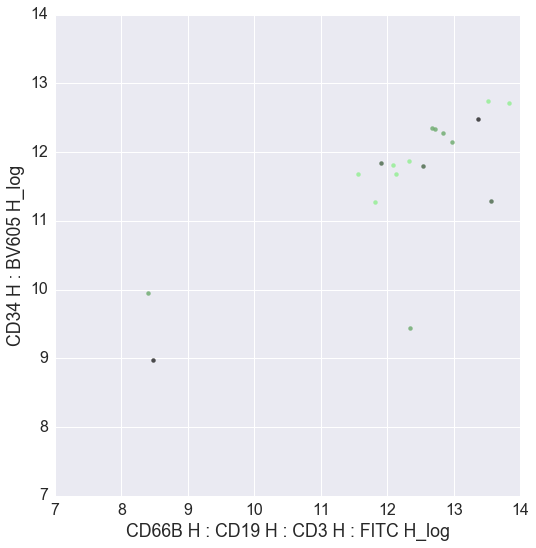

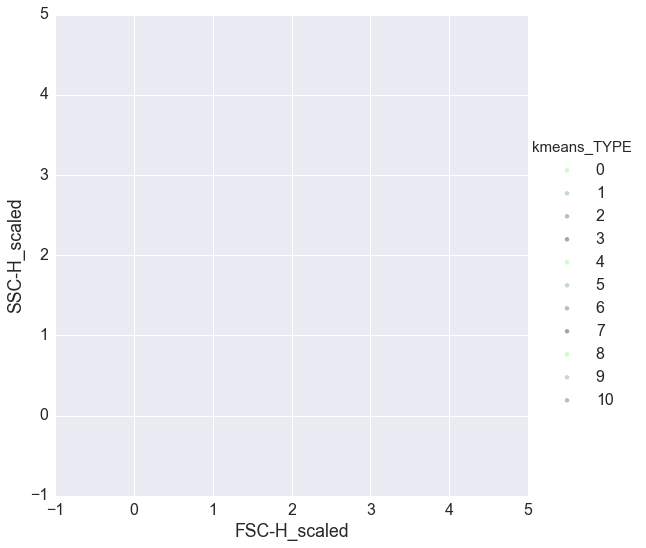

In [468]:
sns.set(font_scale=1.6)

cmap = sns.cubehelix_palette(3, start=2, rot=0, dark=0, light=.95, reverse=True)  
cmap = sns.dark_palette("lightgreen",4, reverse=True)
#cmap = [  0.34986544,  0.53490196,  0.34986544,  1.      ],[   0.34986544,  0.53490196,  0.34986544,  1.       ],[  0.34986544,  0.53490196,  0.34986544,  1.     ]
#
g = sns.lmplot('CD66B H : CD19 H : CD3 H : FITC H_log', 'CD34 H : BV605 H_log', data=subset_TYPE, legend=False,palette = cmap, hue="kmeans_TYPE", fit_reg=False,scatter_kws={'alpha':0.8},size=8)
g.set(ylim=(7, 14))
g.set(xlim=(7, 14))

g = sns.lmplot('FSC-H_scaled', 'SSC-H_scaled', data=subset_TYPE, legend=True,palette = cmap, hue="kmeans_TYPE", fit_reg=False,scatter_kws={'alpha':0.4},size=8)
g.set(ylim=(-1, 5))
g.set(xlim=(-1, 5))

#from scipy.cluster.hierarchy import dendrogram, linkage
#X = subset[colsOfInterestSubFlow].as_matrix()
#plt.scatter(X[:,0], X[:,1],c=subset['cell_type_num'], cmap=["blue","red","green"])
#plt.show()
#colsOfInterestSubFlow

In [407]:
cmap[0]

array([ 0.56470588,  0.93333333,  0.56470588,  1.        ])



# Hierarchical Clustering

In [221]:
plt.show()

In [ ]:
X = subset_TYPE[colsOfInterestSubFlow].as_matrix()
plt.scatter(X[:,0], X[:,1])
plt.show()


In [102]:
Z = linkage(X, 'ward')
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.6273983239040215

In [103]:
Z

array([[  1.80800000e+03,   1.83300000e+03,   3.40701494e-03,
          2.00000000e+00],
       [  1.11200000e+03,   1.53900000e+03,   4.33484224e-03,
          2.00000000e+00],
       [  1.70000000e+03,   2.45600000e+03,   5.63978906e-03,
          2.00000000e+00],
       ..., 
       [  6.61100000e+03,   6.61200000e+03,   1.79660186e+01,
          1.80500000e+03],
       [  6.61300000e+03,   6.61400000e+03,   3.13113375e+01,
          3.04500000e+03],
       [  6.61000000e+03,   6.61500000e+03,   4.17706353e+01,
          3.30900000e+03]])

In [104]:
subset_TYPE.loc[(subset_TYPE['cell_type']=='healthy'),"color"] = "blue"
subset_TYPE.loc[(subset_TYPE['cell_type']=='blast'),"color"] = "red"
subset_TYPE.loc[(subset_TYPE['cell_type']=='nontarget'),"color"] = "green"


In [105]:
xlabels = subset_TYPE["cell_type"].tolist()


In [1]:
f, ax = plt.subplots(figsize=(40, 40))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
d = dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels,
    get_leaves = True,
    color_threshold=max(Z[:,2]),
    count_sort = True,
    orientation = "left",
    labels=xlabels
    #link_color_func = xcolor
)

x = subset.iloc[d["leaves"],subset.columns.get_loc("color")] 
xcolors = list(x.values)

for xtick, color in zip(ax.get_xticklabels(), xcolors):
    xtick.set_color(color)

for ytick, color in zip(ax.get_yticklabels(), xcolors):
    ytick.set_color(color)
    
    

NameError: name 'plt' is not defined

In [179]:

y =  ax.get_xticklabels()
y[[1]]


TypeError: list indices must be integers, not list

In [157]:
from scipy.cluster.hierarchy import fcluster
max_d = 4
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([6849, 6506, 6728, ..., 8192, 4102, 4570], dtype=int32)

In [ ]:
k=3
clusters = fcluster(Z, k, criterion='maxclust')

In [ ]:
colsOfInterest[13]

In [ ]:

plt.figure(figsize=(10, 8))
plt.scatter(X[:,12], X[:,3], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

In [ ]:
subset.loc[subset['cell_type'] =="blast" ,'cell_type_num'] = 1
subset.loc[subset['cell_type'] =="healthy" ,'cell_type_num'] = 2
subset.loc[subset['cell_type'] =="nontarget" ,'cell_type_num'] = 3

In [181]:

plt.figure(figsize=(10, 8))
plt.scatter(X[:,12], X[:,3], c=subset['cell_type_num'], cmap='prism')  # plot points with cluster dependent colors
plt.show()

IndexError: index 12 is out of bounds for axis 1 with size 3

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# check k distance for dbscan
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=int(len(subset)**.5))
knn.fit(subset[colsOfInterest], [1]*len(subset))
distances = np.array(knn.kneighbors_graph(n_neighbors=int(len(subset)**.25), mode='distance').max(axis=1).todense().T)[0]
distances.sort()
plt.plot(distances)
#plt.ylim((0, 1e6))

In [ ]:
# fit dbascn
dbscan = DBSCAN(eps=2e5, min_samples=1000)
#scaler = RobustScaler()
#scaled_data = scaler.fit_transform(testdata[relevant_columns])
dbscan.fit(subset[colsOfInterest])
subset['dbscan'] = dbscan.labels_
# look at class balances
from collections import Counter
counter = Counter(dbscan.labels_)
print counter
# evaluate
dbscan_plots = plotting.pairwise_plots(subset, colsOfInterest, 'dbscan', max_points=1000, opacity=.75)
print 'DBSCAN NMI:', normalized_mutual_info_score(subset['cell_type'], dbscan.labels_)
for p in dbscan_plots: iplot(p)

# HIERARCHICAL K MEANS

In [ ]:
# # use original k means object from above
# data['kmeans2'] = None
# for cluster_label in data['kmeans'].unique():
#     model = k_means_optimized(data[data['kmeans']==cluster_label][relevant_columns].as_matrix())
#     data.loc[data['kmeans']==cluster_label,'kmeans2'] = model.labels_.astype(str) + \
#                                                         data.loc[data['kmeans']==cluster_label,'kmeans'].astype(str)

In [ ]:
# kmeans2_plots = plotting.pairwise_plots(data, relevant_columns, 'kmeans2', max_points=1000, opacity=.75)

In [ ]:
#for p in kmeans2_plots: iplot(p)

# NMF

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=3)
nmf_transformed_data = nmf.fit_transform(data[relevant_columns].as_matrix())
data['nmf'] = np.argmax(nmf_transformed_data, axis=1)
print 'NMF NMI:', normalized_mutual_info_score(data['cell_type'], data['nmf'])
#nmf_plots = plotting.pairwise_plots(data, relevant_columns, 'nmf', max_points=1000, opacity=.75)
#for p in nmf_plots: iplot(p)

# K Means + PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
# scale
scaler = RobustScaler()
data_scaled = scaler.fit_transform(data[relevant_columns])

# pca
pca = PCA(n_components=3)
data_pca_transformed = pca.fit_transform(data_scaled)

In [ ]:
# kmeans_with_pca = KMeans(n_clusters=5)
# kmeans_with_pca.fit(data_pca_transformed)
kmeans_with_pca = k_means_optimized(data_pca_transformed, scale=False)
data['kmeans_with_pca'] = kmeans_with_pca.labels_
print 'KMEANS+PCA NMI:', normalized_mutual_info_score(data['cell_type'], data['kmeans_with_pca'])
#kmeans_with_pca_plots = plotting.pairwise_plots(data, relevant_columns, 'kmeans_with_pca', max_points=1000, opacity=.75)
#for p in kmeans_with_pca_plots: iplot(p)

# DBSCAN WITH PCA

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# scale
scaler = StandardScaler() #RobustScaler()
data_scaled = scaler.fit_transform(data[relevant_columns])

# pca
pca = PCA(n_components=3)
data_pca_transformed = pca.fit_transform(data_scaled)

In [ ]:
# check k distance for dbscan
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=int(len(data)**.5))
knn.fit(data_pca_transformed, [1]*len(data))
distances = np.array(knn.kneighbors_graph(n_neighbors=int(len(data_pca_transformed)**.1), mode='distance').max(axis=1).todense().T)[0]
distances.sort()
py.plot(distances)
py.ylim((0, 1))

In [ ]:
dbscanwithpca = DBSCAN(eps=.1, min_samples=len(data)**.5)
dbscanwithpca.fit(data_pca_transformed)
data['dbscan_with_pca'] = dbscanwithpca.labels_
from collections import Counter
counter = Counter(dbscanwithpca.labels_)
print counter

In [ ]:
print 'DBSCAN+PCA NMI:', normalized_mutual_info_score(data['cell_type'], data['dbscan_with_pca'])
#dbscanwithpca_plots = plotting.pairwise_plots(data, relevant_columns, 'dbscan_with_pca', max_points=10000, opacity=.25)
#for p in dbscanwithpca_plots: iplot(p)

In [ ]:
print("\n" * 100)